In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.models import model_from_json
from glob import glob
import random
import cv2
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("model_a.json", "r") as json_file:
    model_json = json_file.read()

model = model_from_json(model_json)
model.load_weights("model_weights.weights.h5")

# Option 1

In [3]:
# Visualizing Activation Maps
def activation_maps(model, image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))
    img = img.reshape(1, 48, 48, 1) / 255.0

    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img)

    for layer_activation in activations:
        num_filters = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = num_filters // 8
        display_grid = np.zeros((size * n_cols, 8 * size))

        for col in range(n_cols):
            for row in range(8):
                filter_img = layer_activation[0, :, :, col * 8 + row]
                filter_img -= filter_img.mean()
                filter_img /= filter_img.std()
                filter_img *= 64
                filter_img += 128
                filter_img = np.clip(filter_img, 0, 255).astype('uint8')
                display_grid[col * size: (col + 1) * size,
                             row * size: (row + 1) * size] = filter_img

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(f'Activation maps of layer {layer_activation.shape}')
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


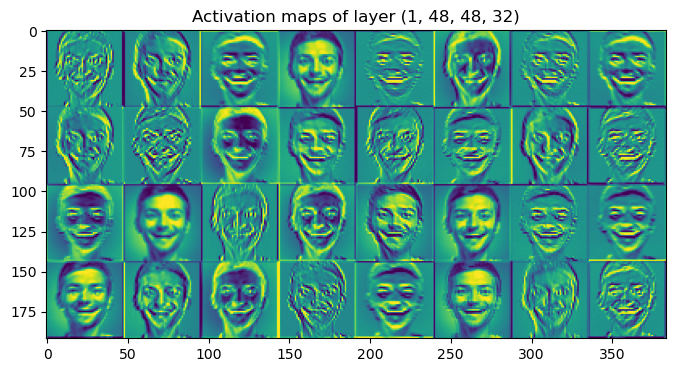

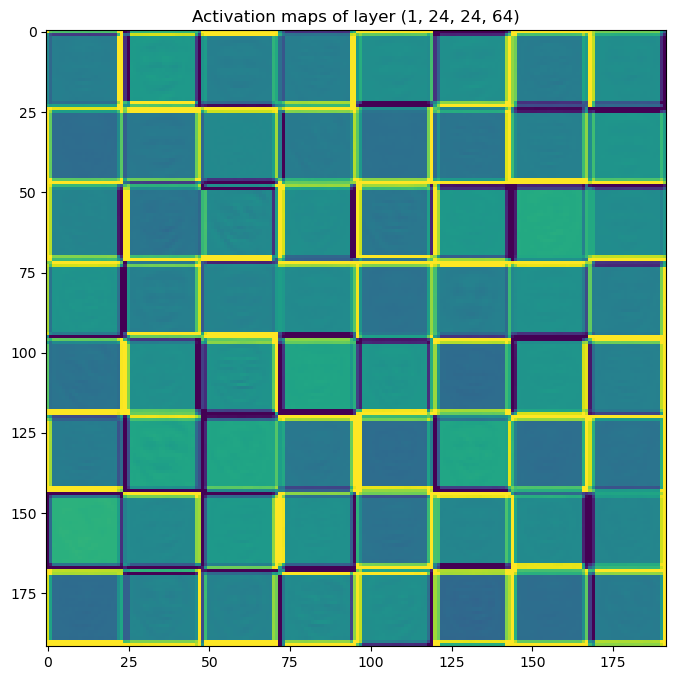

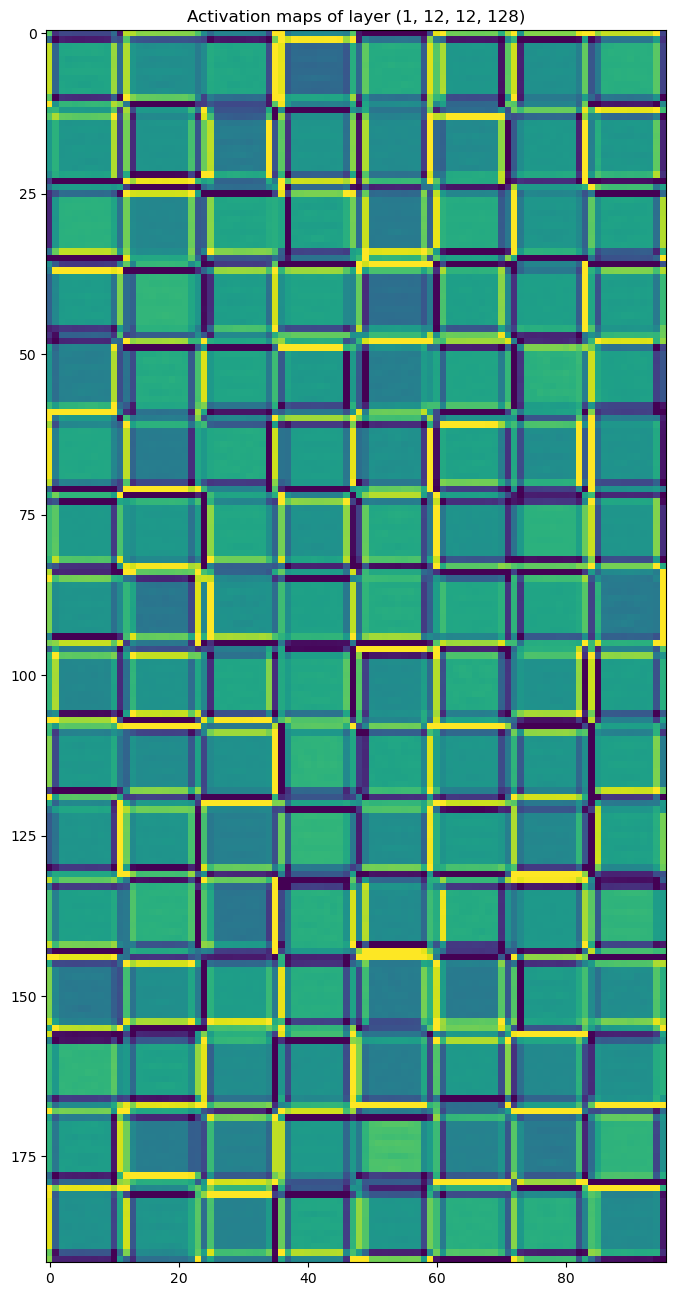

In [4]:
# Visualizing Activation Maps for a specific image path
image_path = "happy.jpg"
activation_maps(model, image_path)

# Option 2

In [5]:
# Load an image
img_path = "happy.jpg"
img = load_img(img_path, target_size=(48, 48), color_mode="grayscale")
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

In [6]:
# Choose a layer to visualize
layer_name = "conv2d"  # Can change to any convolutional layer name to visualize
intermediate_layer_model = tf.keras.Model(
    inputs=model.input,
    outputs=model.get_layer(layer_name).output,
)
intermediate_output = intermediate_layer_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


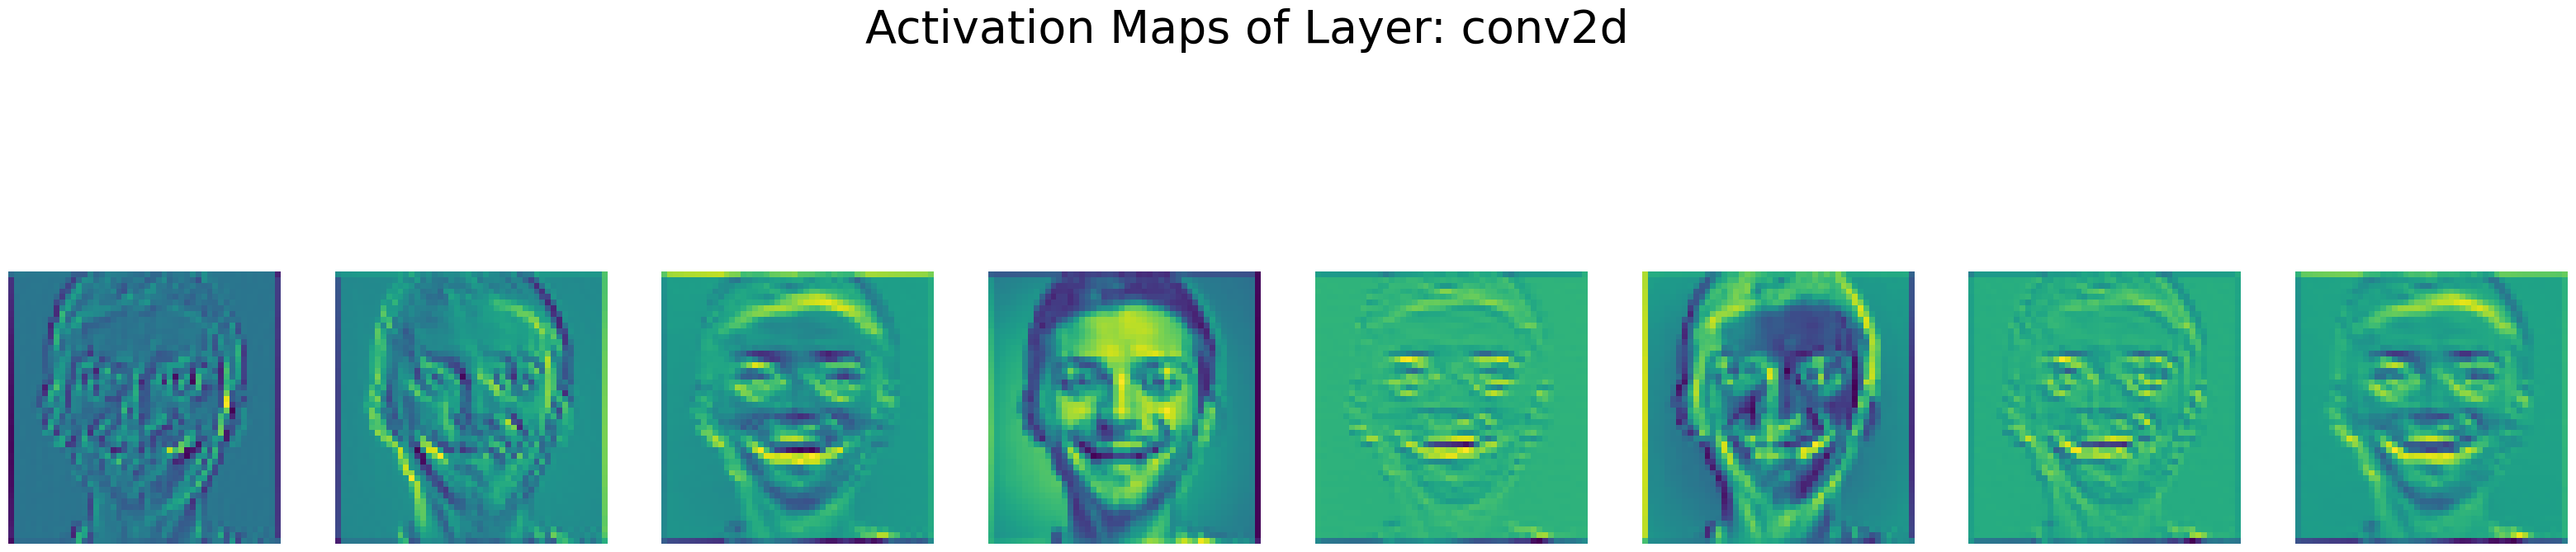

In [7]:
# Visualize activation maps
num_filters = intermediate_output.shape[-1]
fig, axes = plt.subplots(1, min(8, num_filters), figsize=(40, 10))
for i in range(min(8, num_filters)):
    ax = axes[i]
    ax.matshow(intermediate_output[0, :, :, i], cmap="viridis")
    ax.axis("off")
plt.suptitle(f"Activation Maps of Layer: {layer_name}", fontsize=40)
plt.show()